In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from xgboost import plot_tree

from imblearn.combine import SMOTEENN


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the cleaned dataset
data = pd.read_csv('Processed_Telecom_Churn.csv')

# Display the first few rows to inspect the data
data.head()

,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_days,total_usage,usage_per_day
0,2,0,25,10,4,755597,4,124962,44,45,361,0,20123,450,0.022362
1,2,0,55,16,5,125926,2,130556,62,39,5973,0,20123,6074,0.301844
2,3,0,57,1,2,423976,0,148828,49,24,193,1,20123,266,0.013219
3,1,1,46,22,4,522841,1,38722,80,25,9377,1,20123,9482,0.471202
4,1,0,26,24,2,740247,2,55098,78,15,1393,0,20123,1486,0.073846


In [3]:
X = data.drop(columns=['churn'])
y = data['churn']
X.head()

,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,tenure_days,total_usage,usage_per_day
0,2,0,25,10,4,755597,4,124962,44,45,361,20123,450,0.022362
1,2,0,55,16,5,125926,2,130556,62,39,5973,20123,6074,0.301844
2,3,0,57,1,2,423976,0,148828,49,24,193,20123,266,0.013219
3,1,1,46,22,4,522841,1,38722,80,25,9377,20123,9482,0.471202
4,1,0,26,24,2,740247,2,55098,78,15,1393,20123,1486,0.073846


In [4]:
# SMOTEENN for oversampling the minority class
st = SMOTEENN(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = st.fit_resample(X, y)
print("The number of classes before fit:", Counter(y))
print("The number of classes after fit:", Counter(y_train_resampled))

The number of classes before fit: Counter({0: 194726, 1: 48827})
The number of classes after fit: Counter({1: 118534, 0: 80844})


In [5]:
# Perform stratified train-test split to maintain the class distribution
X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42, stratify=y_train_resampled)

In [6]:
#Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#List to store models
models = []

In [8]:
# Function to evaluate models with precision, recall, F1 score, and ROC AUC
def eval_metrics(model, X_test, y_test):
    y_pred_model = model.predict(X_test)
    y_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Print evaluation metrics
    print(f"Precision: {precision_score(y_test, y_pred_model)}")
    print(f"Recall: {recall_score(y_test, y_pred_model)}")
    print(f"F1 Score: {f1_score(y_test, y_pred_model)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_probabilities)}")
    
    # Confusion matrix
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    conf_mat = confusion_matrix(y_test, y_pred_model)
    sns.heatmap(conf_mat, annot=True, fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probabilities)
    plt.subplot(122)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label=f"AUC: {roc_auc_score(y_test, y_probabilities):.3f}")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

Precision: 0.6599810913019989
Recall: 0.8244822204412199
F1 Score: 0.7331170414267764
ROC AUC Score: 0.6650553842455856


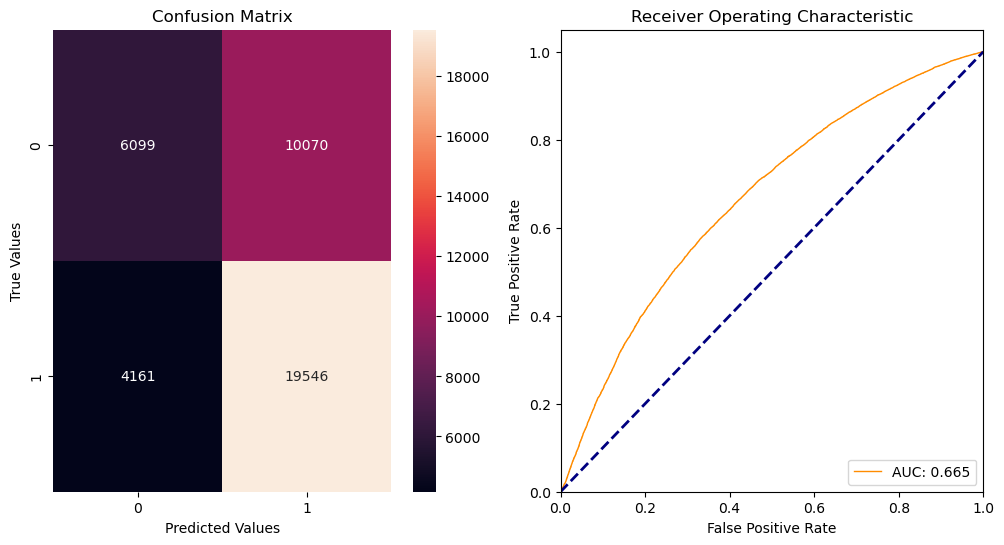

In [9]:
# Initialize and fit different models
# 1. Logistic Regression
churn_lr = LogisticRegression(random_state=42, max_iter=1000)
churn_lr.fit(X_train, y_train)
models.append(churn_lr)
eval_metrics(churn_lr, X_test, y_test)

Precision: 0.7032170923379175
Recall: 0.724722655755684
F1 Score: 0.7138079311992355
ROC AUC Score: 0.638135958343548


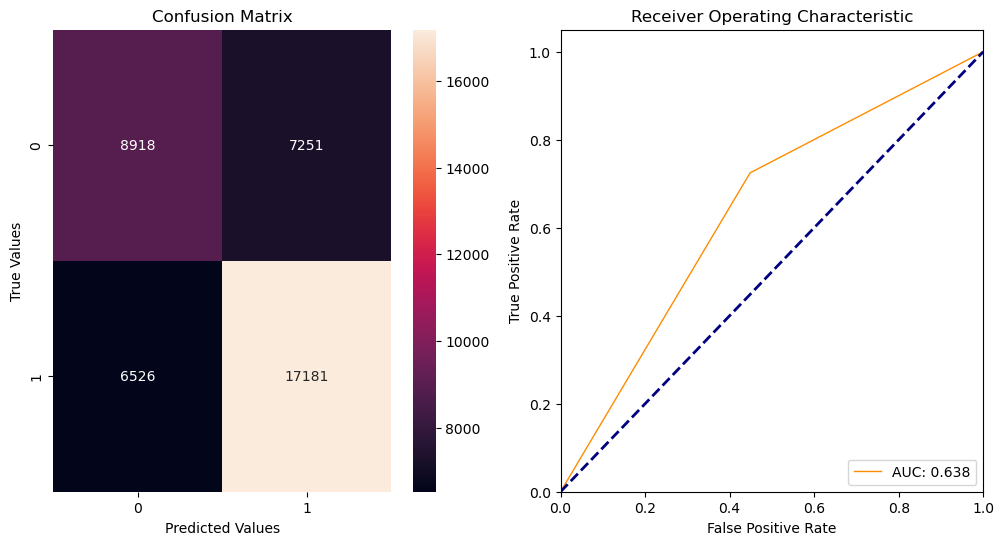

In [10]:
# 2. DecisionTreeClassifier
churn_DT = DecisionTreeClassifier(random_state=42)
churn_DT.fit(X_train, y_train)
models.append(churn_DT)
eval_metrics(churn_DT, X_test, y_test)

Precision: 0.6165588408276748
Recall: 0.9728350276289703
F1 Score: 0.7547657617855449
ROC AUC Score: 0.7339121917583087


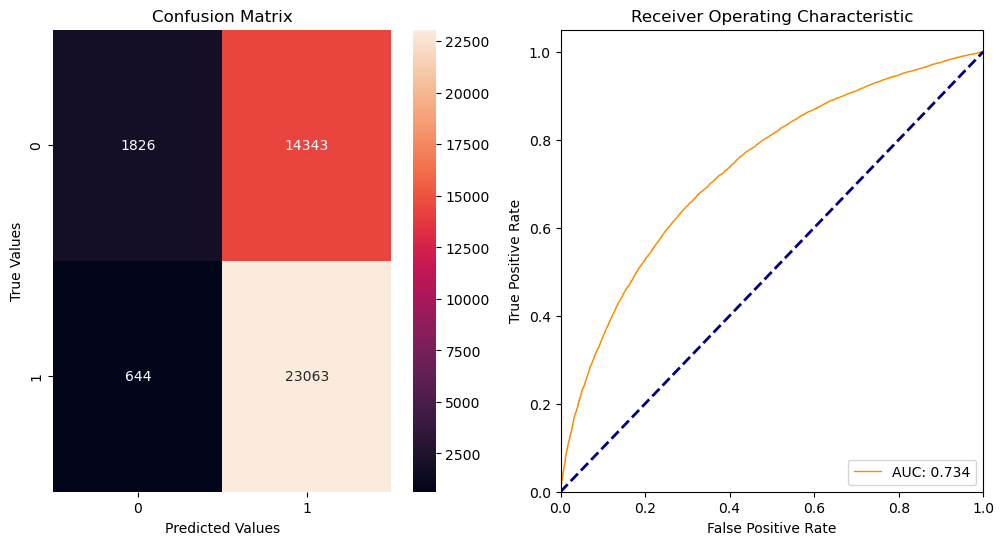

In [11]:
# 3. Gaussian Naive Bayes
churn_GNB = GaussianNB()
churn_GNB.fit(X_train, y_train)
models.append(churn_GNB)
eval_metrics(churn_GNB, X_test, y_test)

Precision: 0.7695775322136674
Recall: 0.813725903741511
F1 Score: 0.7910362078156395
ROC AUC Score: 0.807142886976311


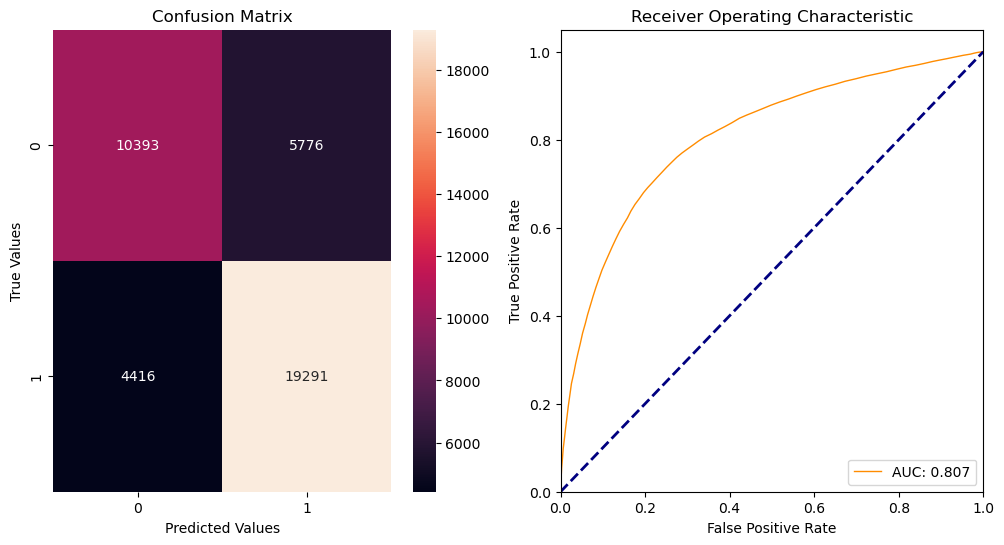

In [12]:
# 4. Random Forest
churn_rf = RandomForestClassifier(random_state=42, n_jobs=-1)
churn_rf.fit(X_train, y_train)
models.append(churn_rf)
eval_metrics(churn_rf, X_test, y_test)

Precision: 0.7187961595273265
Recall: 0.8210655080777829
F1 Score: 0.7665347431429304
ROC AUC Score: 0.7585647859302418


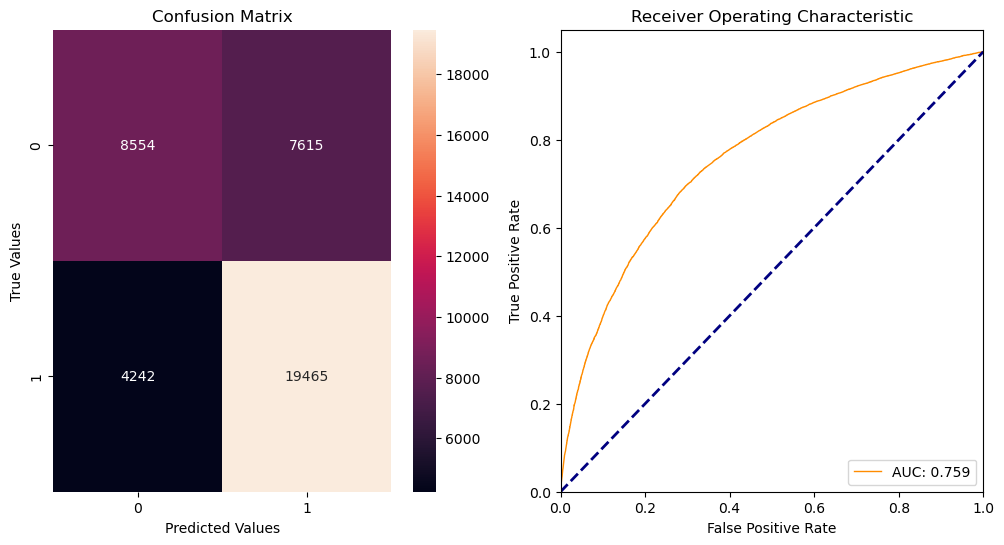

In [13]:
# 5. Gradient Boosting
churn_gb = GradientBoostingClassifier(random_state=42)
churn_gb.fit(X_train, y_train)
models.append(churn_gb)
eval_metrics(churn_gb, X_test, y_test)

Precision: 0.7472356935014549
Recall: 0.8124182730838992
F1 Score: 0.7784648963259367
ROC AUC Score: 0.7851240896202754


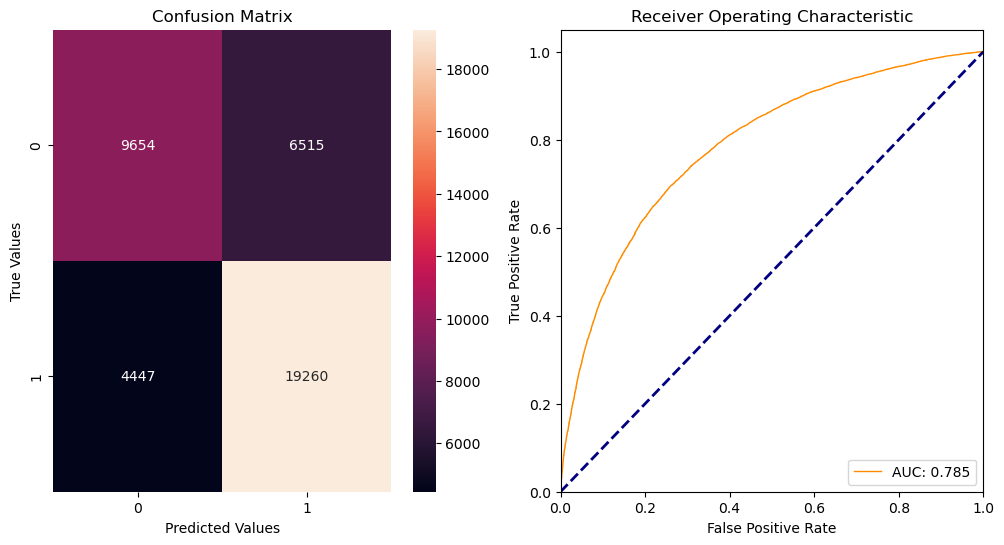

In [14]:
# 6. XGBoost
churn_xgb = XGBClassifier(random_state=42)
churn_xgb.fit(X_train, y_train)
models.append(churn_xgb)
eval_metrics(churn_xgb, X_test, y_test)

In [15]:
# Function to perform grid search cross-validation
def gridsearchcv(model, params, scoring):
    grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1, cv=3, verbose=1, scoring=scoring)
    grid.fit(X_train, y_train)
    return grid

In [16]:
# Models for comparison
Models = [
    LogisticRegression(random_state=42, max_iter=1000),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    RandomForestClassifier(random_state=42, n_jobs=-1),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42, n_jobs=-1),
]

In [17]:
# Model Comparison using K-Fold Cross Validation
result_col = ["Algorithm", "AUC Mean", "Bal Acc Mean", 'Recall']
model_results = pd.DataFrame(columns=result_col)

i = 0
for model in Models:
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)

    cv_acc_results = cross_val_score(model, X_train_resampled, y_train_resampled,
                                     cv=kfold, scoring="balanced_accuracy", n_jobs=-1)
    cv_auc_results = cross_val_score(model, X_train_resampled, y_train_resampled,
                                     cv=kfold, scoring="roc_auc", n_jobs=-1)
    cv_recall_results = cross_val_score(model, X_train_resampled, y_train_resampled,
                                        cv=kfold, scoring="recall", n_jobs=-1)

    model_results.loc[i] = [model.__class__.__name__,
                                    round(cv_auc_results.mean() * 100, 2),
                                    round(cv_acc_results.mean() * 100, 2),
                                    round(cv_recall_results.mean() * 100, 2),
                           ]
    i += 1

model_results = model_results.sort_values(by=['AUC Mean'], ascending=False)
print(model_results)

                    Algorithm  AUC Mean  Bal Acc Mean  Recall
3      RandomForestClassifier     80.19         72.35   81.36
5               XGBClassifier     78.16         70.07   81.34
4  GradientBoostingClassifier     75.85         67.42   82.42
2                  GaussianNB     64.94         51.06   99.22
1      DecisionTreeClassifier     63.20         63.20   71.41
0          LogisticRegression     50.44         50.00  100.00


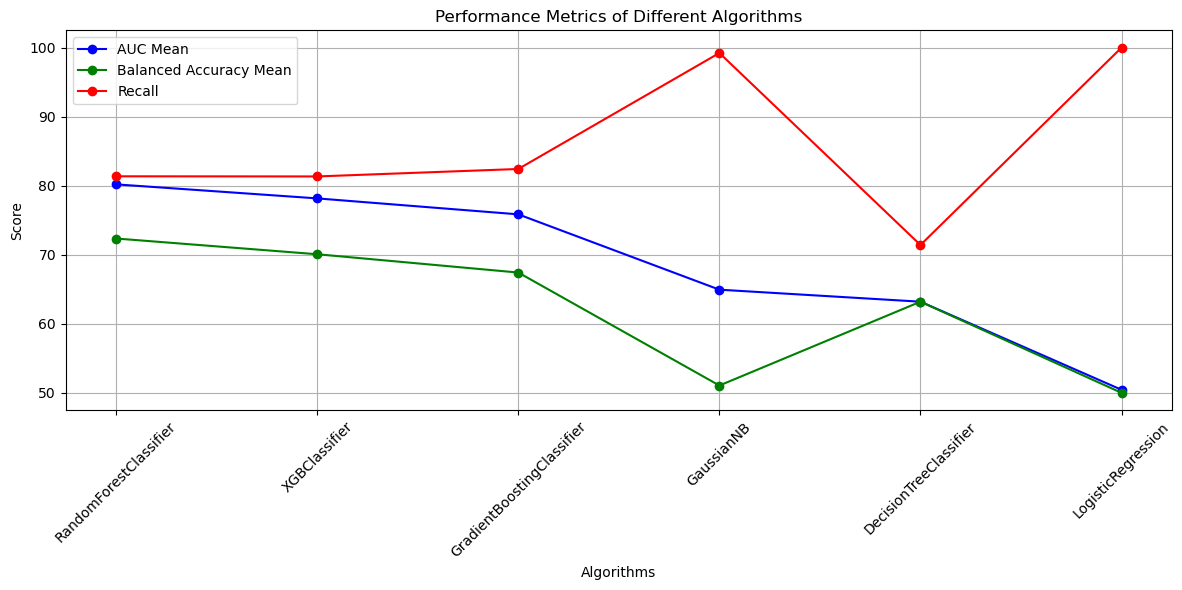

In [19]:
# Sort results by AUC score
model_results = model_results.sort_values(by=['AUC Mean'], ascending=False)

# Plot model performance
plt.figure(figsize=(12, 6))
plt.plot(model_results['Algorithm'], model_results['AUC Mean'], marker='o', label='AUC Mean', color='b')
plt.plot(model_results['Algorithm'], model_results['Bal Acc Mean'], marker='o', label='Balanced Accuracy Mean', color='g')
plt.plot(model_results['Algorithm'], model_results['Recall'], marker='o', label='Recall', color='r')

plt.xticks(rotation=45)
plt.xlabel('Algorithms')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Algorithms')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Hyperparameter tuning for Random Forest
rf_params_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 7],
    'max_features': ['sqrt'],
    'class_weight': ['balanced'],
    'ccp_alpha': [0.001, 0.01]
}

churn_rf = RandomForestClassifier(random_state=42, n_jobs=-1, warm_start=True)
rf_grid = gridsearchcv(churn_rf, rf_params_grid, 'roc_auc')

print('Best Params for RF: ', rf_grid.best_params_)
print('Best Score for RF: ', rf_grid.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params for RF:  {'ccp_alpha': 0.001, 'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}
Best Score for RF:  0.7409371779147035


In [21]:
# Fitting the optimized model
best_params = rf_grid.best_params_
churn_rf_optimal = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                          max_depth=best_params['max_depth'],
                                          max_features=best_params['max_features'],
                                          class_weight=best_params['class_weight'],
                                          ccp_alpha=best_params['ccp_alpha'],
                                          random_state=42, n_jobs=-1, warm_start=True)

churn_rf_optimal.fit(X_train, y_train)


RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced', max_depth=7,
                       n_estimators=300, n_jobs=-1, random_state=42,
                       warm_start=True)

Random Forest Model Evaluation:
Precision: 0.7551486369240604
Recall: 0.6975576833846543
F1 Score: 0.7252115949655746
ROC AUC Score: 0.7409135590782352


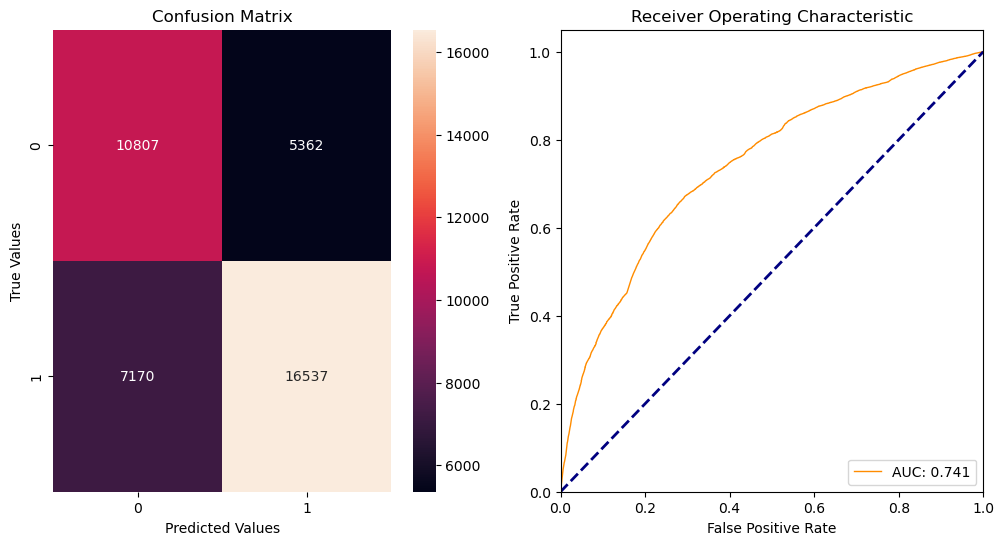

In [22]:
# Evaluate performance
print("Random Forest Model Evaluation:")
eval_metrics(churn_rf_optimal, X_test, y_test)

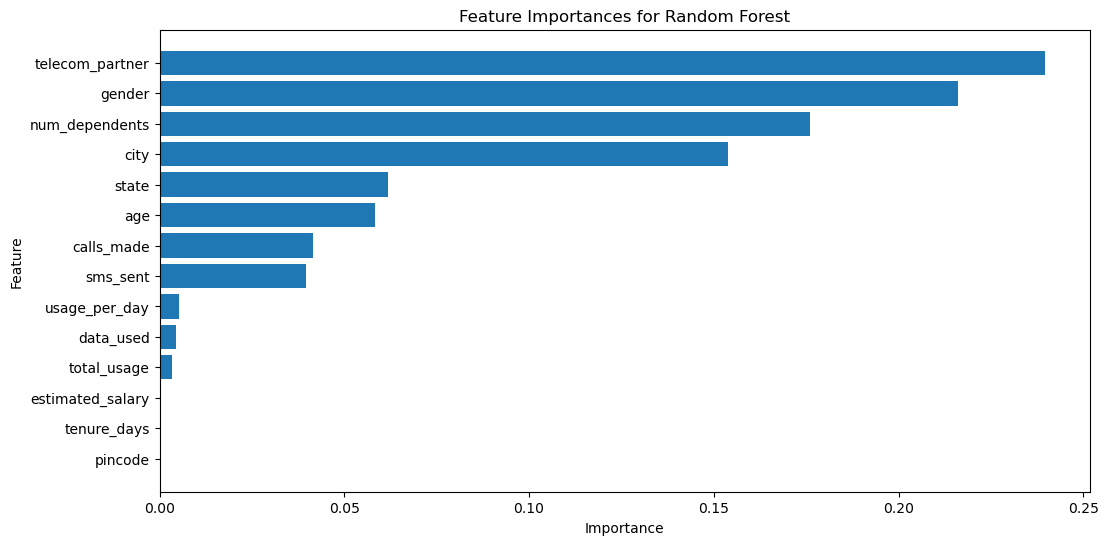

In [23]:
# Feature importance visualization for Random Forest
importances = churn_rf_optimal.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest')
plt.show()

In [24]:
# Hyperparameter tuning for XGBoost
xgb_grid_params = {
    'max_depth': [4, 5],
    'learning_rate': [0.05, 0.1],
    'gamma': [0.25, 0.5],
    'reg_lambda': [5, 10],
    'scale_pos_weight': [5, 7]
}

churn_xgb = XGBClassifier(random_state=42, n_jobs=-1, warm_start=True)
xgb_grid = gridsearchcv(churn_xgb, xgb_grid_params, 'roc_auc')

print('Best Params for XGBoost: ', xgb_grid.best_params_)
print('Best Score for XGBoost: ', xgb_grid.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Params for XGBoost:  {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'reg_lambda': 5, 'scale_pos_weight': 7}
Best Score for XGBoost:  0.7628583839114139


In [36]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xgboost in c:\users\elcot\anaconda3\lib\site-packages (2.1.3)



In [39]:
# Fitting the optimized XGBoost model
best_params = xgb_grid.best_params_
churn_xgb_optimal = XGBClassifier(learning_rate=best_params['learning_rate'],
                                      max_depth=best_params['max_depth'],
                                      reg_lambda=best_params['reg_lambda'],
                                      gamma=best_params['gamma'],
                                      scale_pos_weight=best_params['scale_pos_weight'],
                                      random_state=42, n_jobs=-1, warm_start=True)

churn_xgb_optimal.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=42, ...)

XGBoost Model Evaluation:
Precision: 0.5978115286447145
Recall: 0.9978487366600582
F1 Score: 0.7476848193685008
ROC AUC Score: 0.7641086628739476


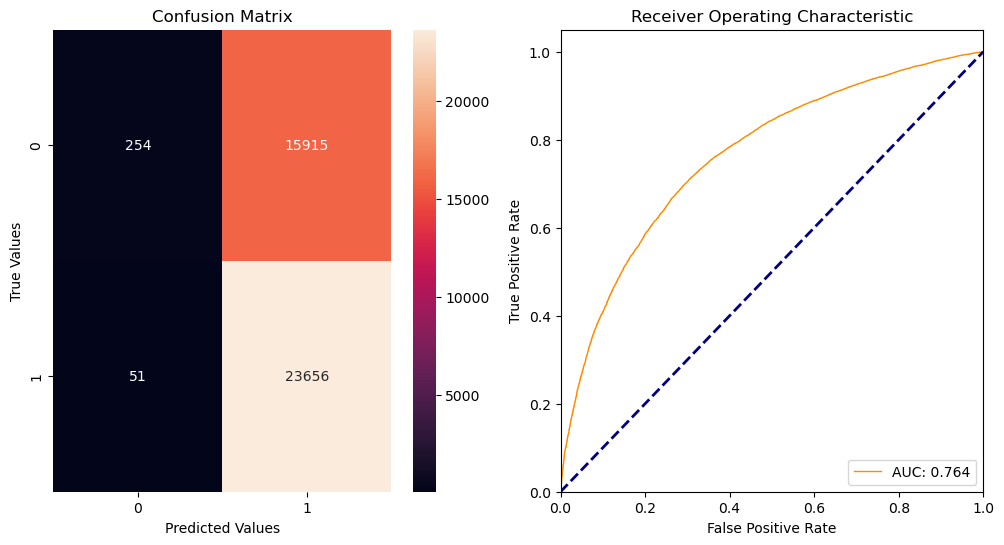

In [40]:
# Evaluate performance
print("XGBoost Model Evaluation:")
eval_metrics(churn_xgb_optimal, X_test, y_test)

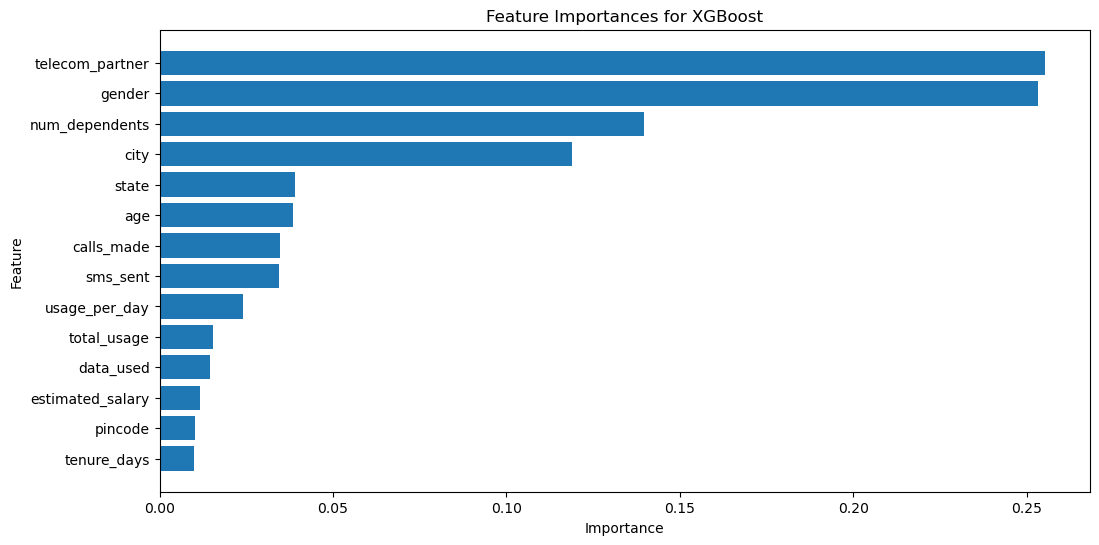

In [41]:
# Feature importance visualization for XGBoost
importances = churn_xgb_optimal.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances['feature'], feature_importances['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for XGBoost')
plt.show()

In [43]:
import pickle

# Save the final XGBoost model to disk
pickle.dump(churn_xgb_optimal, open('churn_xgb_optimal.pkl', 'wb'))

In [44]:
# Save the final XGBoost model to disk
pickle.dump(churn_rf_optimal, open('churn_rf_optimal.pkl', 'wb'))